# Importing Dependencies

In [1]:
# File handeling 
import numpy as np
import pandas as pd 

#Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

plt.style.use('ggplot')

# NLP library
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import string

In [2]:
review_df = pd.read_csv('/home/rohan/Documents/Project Titanic/NLP/Company_Review_Sentiment_Analysis/sentiment-analysis-company-reviews/train.csv') 

In [3]:
print(review_df.shape)
review_df.head()

(60000, 3)


,Id,Review,Rating
0,0,Very good value and a great tv very happy and ...,5
1,1,After 6 month still can't access my account,3
2,2,I couldn't make an official review on a produc...,1
3,3,"Fantastic! Extremely easy to use website, fant...",5
4,4,So far annoyed as hell with this bt monthly pa...,1


In [4]:
review_df['Review'][0]  

'Very good value and a great tv very happy and delivery next day and free well done Hughes'

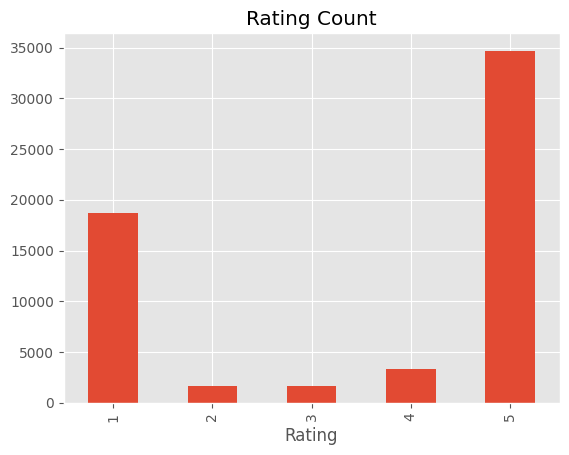

In [5]:
# Rating score count

ax = review_df['Rating'].value_counts().sort_index() \
    .plot(kind= 'bar', title = "Rating Count")
ax.set_xlabel("Rating")
plt.show()

# Preprocess the Text Data
**Defining a function for text preprocessing:**
- Lowercase the text
- Remove punctuation
- Remove stopwords
- Tokenize the text

In [7]:
#lower
review_df['cleaned_review'] = review_df['Review'].apply(lambda x: x.lower() if isinstance(x, str) else x)

In [8]:
review_df.head()

,Id,Review,Rating,cleaned_review
0,0,Very good value and a great tv very happy and ...,5,very good value and a great tv very happy and ...
1,1,After 6 month still can't access my account,3,after 6 month still can't access my account
2,2,I couldn't make an official review on a produc...,1,i couldn't make an official review on a produc...
3,3,"Fantastic! Extremely easy to use website, fant...",5,"fantastic! extremely easy to use website, fant..."
4,4,So far annoyed as hell with this bt monthly pa...,1,so far annoyed as hell with this bt monthly pa...


In [9]:
# remove punctuation

review_df['cleaned_review'] = review_df['cleaned_review'].str.replace(f"[{string.punctuation}]", "", regex=True)
review_df['cleaned_review'][0]

'very good value and a great tv very happy and delivery next day and free well done hughes'

In [10]:
stop_words = set(stopwords.words('english'))

# Function to tokenize and remove stop words
def remove_stop_words(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.isalnum()]
    return ' '.join(filtered_tokens)

# Apply the function to the 'text' column
review_df['cleaned_review'] = review_df['cleaned_review'].apply(remove_stop_words)

In [11]:
#Tokenizing Text
from nltk.stem import WordNetLemmatizer

In [12]:
lemmatizer = WordNetLemmatizer()
# Function to tokenize, remove stop words, and lemmatize
def clean_text(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.isalnum()]
    lemmatized_tokens = [lemmatizer.lemmatize(word.lower()) for word in filtered_tokens]
    return ' '.join(lemmatized_tokens)

# Apply the function to the 'text' column
review_df['cleaned_review'] = review_df['cleaned_review'].apply(clean_text)

In [13]:
# Sentiment representation 0 --> Negative , 1 --> Positive
 
review_df["Rating"] = np.where((review_df['Rating'] == 1) | (review_df['Rating'] == 2), 0, 1)

In [14]:
review_df['Rating'].value_counts()

Rating
1    39708
0    20292
Name: count, dtype: int64

In [15]:
X = review_df['cleaned_review'] 
y = review_df['Rating']

# Bag of Words

In [16]:
vectorizer = CountVectorizer()

In [17]:
X_bow_vec = vectorizer.fit_transform(X)

In [18]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bow_vec, y, test_size=0.2, stratify = y ,random_state=42)

# Naive Bayes Classifier with bag of words

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [20]:
# Initialize the Multinomial Naive Bayes model
model_NB = MultinomialNB()

# Train the model
model_NB.fit(X_train, y_train)

# Make predictions
y_pred = model_NB.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy: .2f}')
print(f'Classification Report:\n {report}')

Accuracy:  0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      4058
           1       0.96      0.94      0.95      7942

    accuracy                           0.94     12000
   macro avg       0.93      0.94      0.93     12000
weighted avg       0.94      0.94      0.94     12000



# Catboosting

In [21]:
from catboost import CatBoostClassifier
cb_model = CatBoostClassifier()

In [22]:
# Train the model
cb_model.fit(X_train, y_train)

# Make predictions
y_pred = cb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy: .2f}')
print(f'Classification Report:\n {report}')

Learning rate set to 0.053805
0:	learn: 0.6566193	total: 325ms	remaining: 5m 24s
1:	learn: 0.6285073	total: 455ms	remaining: 3m 47s
2:	learn: 0.6030470	total: 591ms	remaining: 3m 16s
3:	learn: 0.5786314	total: 726ms	remaining: 3m
4:	learn: 0.5563841	total: 871ms	remaining: 2m 53s
5:	learn: 0.5390206	total: 1s	remaining: 2m 46s
6:	learn: 0.5229484	total: 1.15s	remaining: 2m 43s
7:	learn: 0.5053455	total: 1.28s	remaining: 2m 38s
8:	learn: 0.4927506	total: 1.42s	remaining: 2m 36s
9:	learn: 0.4747495	total: 1.56s	remaining: 2m 34s
10:	learn: 0.4627269	total: 1.7s	remaining: 2m 33s
11:	learn: 0.4526858	total: 1.84s	remaining: 2m 31s
12:	learn: 0.4429850	total: 1.98s	remaining: 2m 30s
13:	learn: 0.4340713	total: 2.12s	remaining: 2m 29s
14:	learn: 0.4259108	total: 2.26s	remaining: 2m 28s
15:	learn: 0.4191463	total: 2.39s	remaining: 2m 27s
16:	learn: 0.4126769	total: 2.55s	remaining: 2m 27s
17:	learn: 0.4023632	total: 2.69s	remaining: 2m 26s
18:	learn: 0.3968505	total: 2.84s	remaining: 2m 26s


In [23]:
# Predicts new text based on the trained model

def predict_new_text_bag(text):
    cleaned_text = clean_text(text)  # Clean the text
    transformed_text = vectorizer.transform([cleaned_text])  # Transform the text using the fitted vectorizer
    prediction = model_NB.predict(transformed_text)  # Predict using the trained model
    result = prediction[0]
    if result == 0:
        return "Negative"
    else:
        return "Positive"

In [24]:
new_text = "This product is a waste of time and money"
prediction = predict_new_text_bag(new_text)
print(f'Prediction for "{new_text}": {prediction}')

Prediction for "This product is a waste of time and money": Negative


# TFIDF for embedding

In [25]:
tfidf_vec = TfidfVectorizer()

In [26]:
X_tfidf_vec = tfidf_vec.fit_transform(X)

In [27]:
# Test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_vec, y, test_size=0.2, stratify = y ,random_state=101)

# Naive Bayes Classifier with TFIDF vectorizer

In [28]:
# Training model
model_NB.fit(X_train, y_train)

# Making prediction
y_pred = model_NB.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy for Naive Bayes with TFIDF vectorizer: {accuracy: .2f}')
print(f'Classification Report:\n {report}')

Accuracy for Naive Bayes with TFIDF vectorizer:  0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91      4058
           1       0.95      0.96      0.96      7942

    accuracy                           0.94     12000
   macro avg       0.93      0.93      0.93     12000
weighted avg       0.94      0.94      0.94     12000



In [29]:
# Predicts new text based on the trained model

def predict_new_text_TFIDF(text):
    cleaned_text = clean_text(text)  # Clean the text
    transformed_text = tfidf_vec.transform([cleaned_text])  # Transform the text using the fitted vectorizer
    prediction = model_NB.predict(transformed_text)  # Predict using the trained model
    result = prediction[0]
    if result == 0:
        return "Negative"
    else:
        return "Positive"

In [30]:
new_text = "This is a best book."
prediction = predict_new_text_TFIDF(new_text)
print(f'Prediction for "{new_text}": {prediction}')

Prediction for "This is a best book.": Positive
